In [169]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from plot_utils import *
import csv

model = "gpt-4o"
environment = "morals"
file_name = f"../results/{model}_oed_direct_errors_by_obs.csv"


In [170]:
# read the csv file with csv.reader
with open(file_name, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
print(data)

[['Environment', 'Prior', 'Obs_Index', 'Mean_Error', 'CI_95'], ['hyperbolic_temporal_discount', 'True', '0', '0.31810863256752786', '0.07471301709161536'], ['hyperbolic_temporal_discount', 'True', '1', '0.5311996848901754', '0.21782400428998205'], ['hyperbolic_temporal_discount', 'True', '3', '0.914763579070941', '0.14942603418323075'], ['hyperbolic_temporal_discount', 'True', '5', '0.744290737212823', '0.29885206836646155'], ['hyperbolic_temporal_discount', 'True', '7', '0.829527158141882', '0.217824004289982'], ['hyperbolic_temporal_discount', 'True', '10', '0.8721453686064116', '0.14942603418323075'], ['hyperbolic_temporal_discount', 'False', '0', '0.9573817895354704', '0.2988520683664615'], ['hyperbolic_temporal_discount', 'False', '1', '0.9573817895354704', '0.07471301709161537'], ['hyperbolic_temporal_discount', 'False', '3', '1.0852364209290593', '0.09150438450914807'], ['hyperbolic_temporal_discount', 'False', '5', '1.2130910523226475', '0.23626330487259356'], ['hyperbolic_temp

In [171]:
# remove the header row
data = data[1:]

In [172]:
new_data = [d for d in data if d[0] == environment]

In [173]:
new_data


[['morals', 'True', '0', '0.401040384879687', '0.13273055571076023'],
 ['morals', 'True', '1', '0.684332094733889', '0.3051565910698559'],
 ['morals', 'True', '3', '0.48198087340945905', '0.17378509102231768'],
 ['morals', 'True', '5', '0.48198087340945905', '0.17378509102231768'],
 ['morals', 'True', '7', '0.5224511176743452', '0.1808812575976428'],
 ['morals', 'True', '10', '0.3605701406148011', '0.08689254551115892']]

In [174]:
# only keep where col 2 is True
prior_data = [d for d in new_data if d[1] == "True"]
no_prior_data = [d for d in new_data if d[1] == "False"]

In [175]:
errs = [float(d[3]) for d in prior_data]
stderrs = [float(d[4]) /1.96 for d in prior_data]
errs_no_prior = [float(d[3]) for d in no_prior_data]
stderrs_no_prior = [float(d[4]) /1.96 for d in no_prior_data]


In [176]:
means1 = errs
ci1 = stderrs
if len(errs_no_prior) > 0:
    means2 = errs_no_prior
    ci2 = stderrs_no_prior
    x_labels = ["Prior", "No Prior"]
else:
    means2 = None
    ci2 = None
    x_labels = ["Prior"]
print(means1)
print(ci1)
print(means2)
print(ci2)


[0.401040384879687, 0.684332094733889, 0.48198087340945905, 0.48198087340945905, 0.5224511176743452, 0.3605701406148011]
[0.06771967128100012, 0.1556921383009469, 0.0886658627664886, 0.0886658627664886, 0.0922863559171647, 0.04433293138324435]
None
None


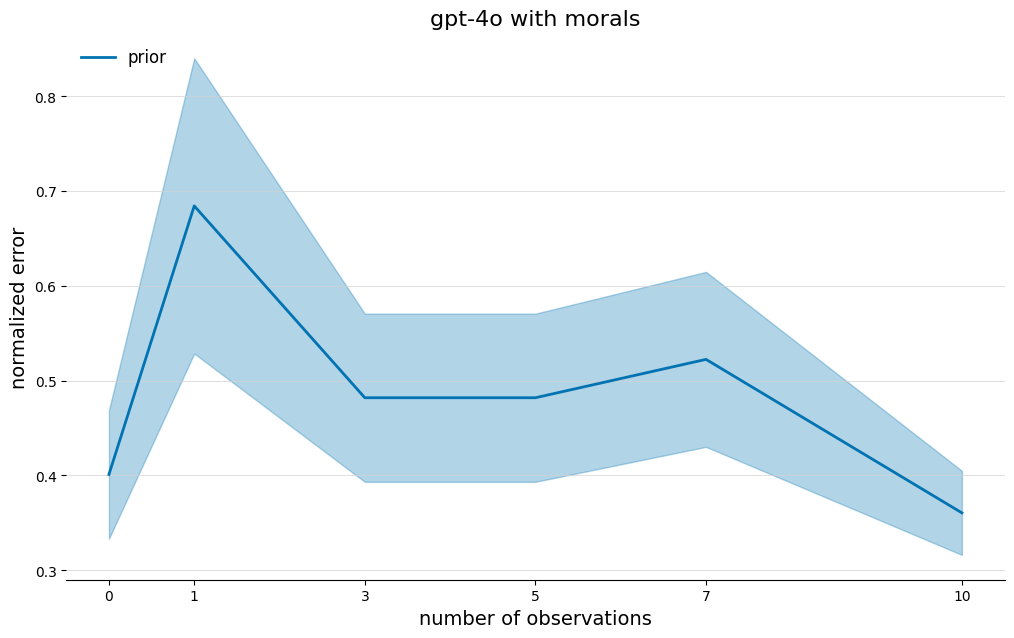

In [177]:
plot_lines([0, 1, 3, 5, 7, 10], means1, ci1, means2, ci2, "prior", "no prior", "number of observations", "normalized error", f"{model} with {environment}", f"{model}_{environment}.png")